In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_barley = pd.read_csv('barley_obs.csv', parse_dates=True)

In [3]:
df_barley

,s_id,lon,lat,alt,alt_dem,gss_id,species,phase_id,year,month,day,day_year,cult_season
0,3147,8.85000,49.2000,250,223,1660100,Hordeum vulgare,0,1951,2,13,44,1
1,4329,9.80000,50.0667,240,255,1660100,Hordeum vulgare,0,1951,2,26,57,1
2,3147,8.85000,49.2000,250,223,1660100,Hordeum vulgare,10,1951,3,1,60,1
3,3090,8.70000,49.2500,140,188,1660100,Hordeum vulgare,0,1951,3,2,61,1
4,3845,12.00000,49.5500,400,398,1660100,Hordeum vulgare,0,1951,3,2,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716805,6267,11.15000,50.5833,630,634,1660100,Hordeum vulgare,100,1963,8,31,243,1
716806,202,10.05000,54.1667,35,19,1660100,Hordeum vulgare,100,1963,9,1,244,1
716807,247,9.21667,54.3500,10,16,1660100,Hordeum vulgare,100,1963,9,1,244,1
716808,1246,7.06667,51.2333,220,191,1660100,Hordeum vulgare,100,1963,9,1,244,2


In [4]:
df_barley.head()
print(df_barley.dtypes)

s_id             int64
lon            float64
lat            float64
alt              int64
alt_dem          int64
gss_id           int64
species         object
phase_id         int64
year             int64
month            int64
day              int64
day_year         int64
cult_season      int64
dtype: object


In [5]:
df_barley['cult_season'].unique()

array([1, 2])

In [6]:
df_barley['alt'].tolist().count(-9999) # all the altitude data are available

0

In [7]:
stations_id_lst = df_barley['s_id'].unique().tolist()

In [8]:
length = len (stations_id_lst)
print(length)

6043


In [9]:
keys = stations_id_lst
values = [i for i in range (0, 6043, 1)]
print(len(values))
stations_corresp_dict = dict(zip(keys,values))

6043


In [10]:
df_barley=df_barley.replace({"s_id": stations_corresp_dict})

In [11]:
df_barley['s_id']=df_barley['s_id'].astype("category")

In [12]:
phases_id_lst = df_barley['phase_id'].unique().tolist()

In [13]:
len_phases = len(phases_id_lst)
len_phases

6

In [14]:
p_keys = phases_id_lst
p_values = [i for i in range (0, 6, 1)]
phases_corresp_dict = dict(zip(p_keys,p_values))

In [15]:
phases_corresp_dict

{0: 0, 10: 1, 31: 2, 51: 3, 100: 4, 85: 5}

In [16]:
df_barley=df_barley.replace({"phase_id": phases_corresp_dict})

In [17]:
df_barley['phase_id']=df_barley['phase_id'].astype("category")

In [18]:
df_barley.dtypes

s_id           category
lon             float64
lat             float64
alt               int64
alt_dem           int64
gss_id            int64
species          object
phase_id       category
year              int64
month             int64
day               int64
day_year          int64
cult_season       int64
dtype: object

In [19]:
df_barley.drop(['alt_dem', 'gss_id', 'species'], axis=1, inplace=True)

In [20]:
df_barley

,s_id,lon,lat,alt,phase_id,year,month,day,day_year,cult_season
0,0,8.85000,49.2000,250,0,1951,2,13,44,1
1,1,9.80000,50.0667,240,0,1951,2,26,57,1
2,0,8.85000,49.2000,250,1,1951,3,1,60,1
3,2,8.70000,49.2500,140,0,1951,3,2,61,1
4,3,12.00000,49.5500,400,0,1951,3,2,61,1
...,...,...,...,...,...,...,...,...,...,...
716805,2419,11.15000,50.5833,630,4,1963,8,31,243,1
716806,964,10.05000,54.1667,35,4,1963,9,1,244,1
716807,913,9.21667,54.3500,10,4,1963,9,1,244,1
716808,4042,7.06667,51.2333,220,4,1963,9,1,244,2


In [25]:
a = pd.DataFrame(df_barley.groupby(by=['s_id','phase_id','cult_season','year']).size())

In [28]:
a[0].unique().tolist()
# for each station, phase_id, year there is only one data point, when the cult_season is considered

[1, 0]

In [74]:
df_summerbarley = df_barley[df_barley['cult_season']==1] #summer crop sown in spring
df_winterbarley = df_barley[df_barley['cult_season']==2] #winter crop sown in autumn

In [75]:
df_summerbarley.drop(['cult_season'], axis=1, inplace=True)
df_winterbarley.drop(['cult_season'], axis=1, inplace=True)


/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
df_summerbarley.isnull().sum()

s_id        0
lon         0
lat         0
alt         0
phase_id    0
year        0
month       0
day         0
day_year    0
dtype: int64

In [77]:
len(df_summerbarley)

316079

In [78]:
len(df_summerbarley['s_id'].unique().tolist())

5613

In [79]:
df_sb_ord = df_summerbarley.sort_values(['phase_id', 's_id'], ascending=True)

In [80]:
df_sb_ord.to_csv("summerbarley.csv", index=0)

## Summer barley

In [81]:
summerbarley_phases = df_summerbarley['phase_id'].unique().tolist()

In [82]:
summerbarley_phases

[0, 1, 2, 3, 4]

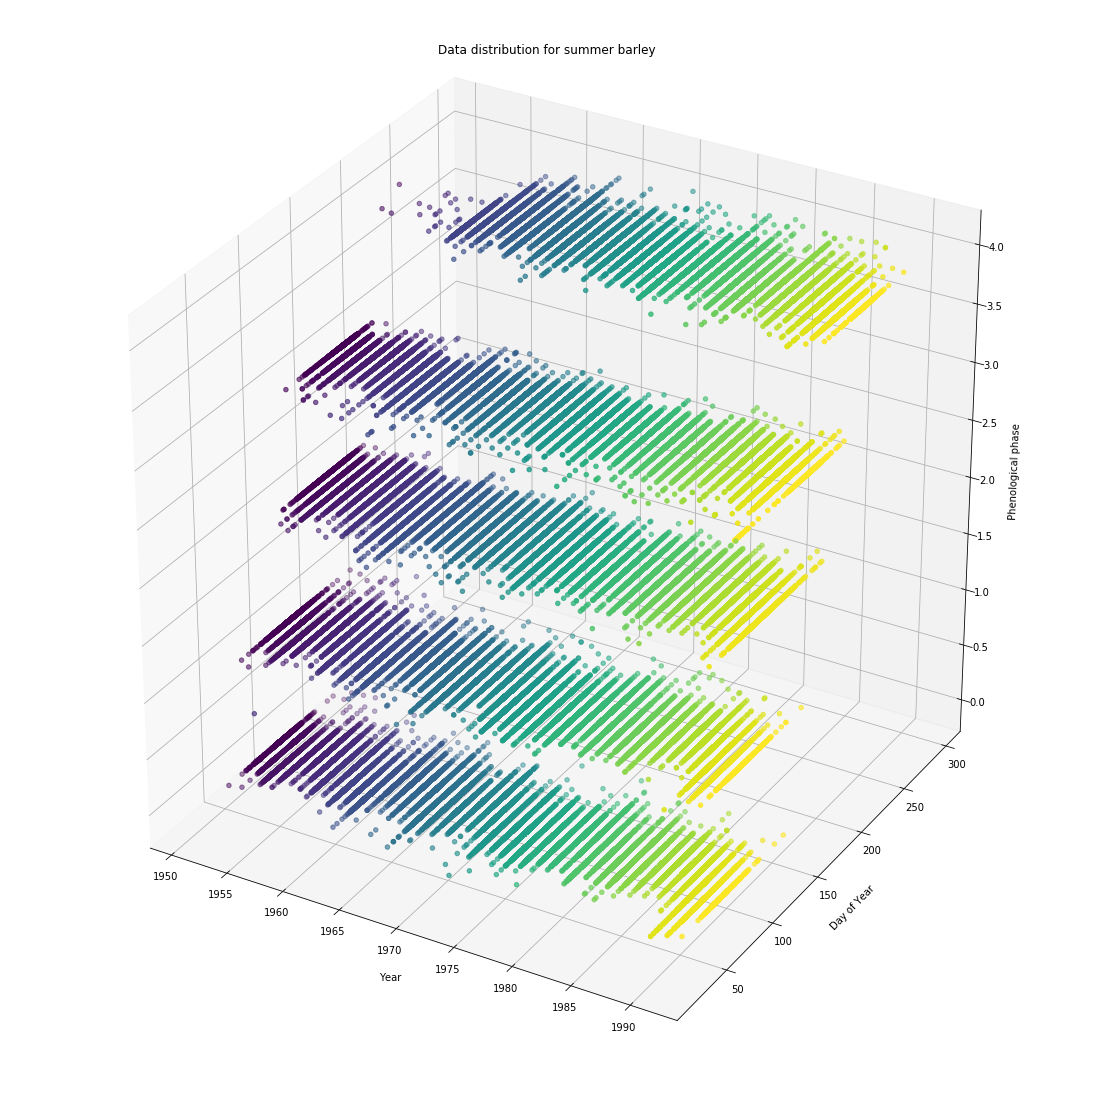

In [83]:
# 3D-Scatterplot


fig = plt.figure(figsize=(15,15))
ax=Axes3D(fig)


xs = df_summerbarley['year']
ys = df_summerbarley['day_year']
zs =df_summerbarley['phase_id']
ax.scatter(xs, ys, zs, c=df_summerbarley['year'])
ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel('Day of Year', labelpad=10)
ax.set_zlabel('Phenological phase', labelpad=10)

plt.title("Data distribution for summer barley", pad=40)
plt.show()

In [84]:
df_summerbarley.groupby(by='phase_id').agg({'day_year': ['mean', 'median','min', 'max']}).dropna()

day_year                     
                mean median    min    max
phase_id                                 
0          89.882450   90.0   28.0  159.0
1         105.721406  106.0   18.0  181.0
2         142.220052  141.0   75.0  207.0
3         164.482033  165.0   89.0  216.0
4         220.552790  220.0  163.0  297.0

In [99]:
df_summerbarley.groupby(by=['phase_id','s_id'])['day_year'].size()

phase_id  s_id
0         0       28
          1       40
          2       37
          3       10
          4       14
                  ..
5         6038     0
          6039     0
          6040     0
          6041     0
          6042     0
Name: day_year, Length: 36258, dtype: int64

In [100]:
a = pd.DataFrame(df_summerbarley.groupby(by=['phase_id','s_id', 'year'])['day_year'].size())

In [103]:
a['day_year'].unique().tolist()

[1, 0]

In [86]:
df_ps = df_summerbarley.groupby(by=['phase_id','s_id']).agg({'day_year': ['mean', 'median','min', 'max']}).dropna()

In [87]:
df_ps

day_year                     
                     mean median    min    max
phase_id s_id                                 
0        0      78.642857   74.0   44.0  107.0
         1      77.100000   76.0   55.0  100.0
         2      80.810811   80.0   61.0  110.0
         3      83.600000   85.0   61.0  104.0
         4      74.714286   72.5   60.0   93.0
...                   ...    ...    ...    ...
4        6028  217.000000  217.0  212.0  222.0
         6029  223.000000  223.0  216.0  230.0
         6031  228.000000  228.0  228.0  228.0
         6033  217.000000  217.0  217.0  217.0
         6039  274.000000  274.0  274.0  274.0

[23592 rows x 4 columns]

In [30]:
df_sb = pd.read_csv("summerbarley.csv")

In [31]:
df_sb

,s_id,lon,lat,alt,phase_id,year,month,day,day_year
0,0,8.85000,49.2000,250,0,1951,2,13,44
1,0,8.85000,49.2000,250,0,1952,3,10,70
2,0,8.85000,49.2000,250,0,1953,3,4,63
3,0,8.85000,49.2000,250,0,1954,3,15,74
4,0,8.85000,49.2000,250,0,1960,3,6,66
...,...,...,...,...,...,...,...,...,...
316074,6029,10.16670,49.2000,470,4,1961,8,4,216
316075,6029,10.16670,49.2000,470,4,1962,8,18,230
316076,6031,6.90000,52.0667,45,4,1961,8,16,228
316077,6033,10.53330,52.6000,65,4,1962,8,5,217


In [32]:
df_sb.groupby(by=['s_id','phase_id','year']).size()

s_id  phase_id  year
0     0         1951    1
                1952    1
                1953    1
                1954    1
                1955    1
                       ..
6039  0         1963    1
      1         1963    1
      3         1963    1
      4         1962    1
6041  3         1963    1
Length: 316079, dtype: int64

In [33]:
df_sb_harvest = df_sb[df_sb['phase_id']==4]

In [34]:
df_sb_harvest

,s_id,lon,lat,alt,phase_id,year,month,day,day_year
255698,0,8.85000,49.2000,250,4,1959,8,1,213
255699,0,8.85000,49.2000,250,4,1960,7,24,206
255700,0,8.85000,49.2000,250,4,1964,8,9,222
255701,0,8.85000,49.2000,250,4,1980,8,4,217
255702,0,8.85000,49.2000,250,4,1971,7,29,210
...,...,...,...,...,...,...,...,...,...
316074,6029,10.16670,49.2000,470,4,1961,8,4,216
316075,6029,10.16670,49.2000,470,4,1962,8,18,230
316076,6031,6.90000,52.0667,45,4,1961,8,16,228
316077,6033,10.53330,52.6000,65,4,1962,8,5,217


In [35]:
df_sb_harvest.drop(['phase_id'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
df_sb_harvest

,s_id,lon,lat,alt,year,month,day,day_year
255698,0,8.85000,49.2000,250,1959,8,1,213
255699,0,8.85000,49.2000,250,1960,7,24,206
255700,0,8.85000,49.2000,250,1964,8,9,222
255701,0,8.85000,49.2000,250,1980,8,4,217
255702,0,8.85000,49.2000,250,1971,7,29,210
...,...,...,...,...,...,...,...,...
316074,6029,10.16670,49.2000,470,1961,8,4,216
316075,6029,10.16670,49.2000,470,1962,8,18,230
316076,6031,6.90000,52.0667,45,1961,8,16,228
316077,6033,10.53330,52.6000,65,1962,8,5,217


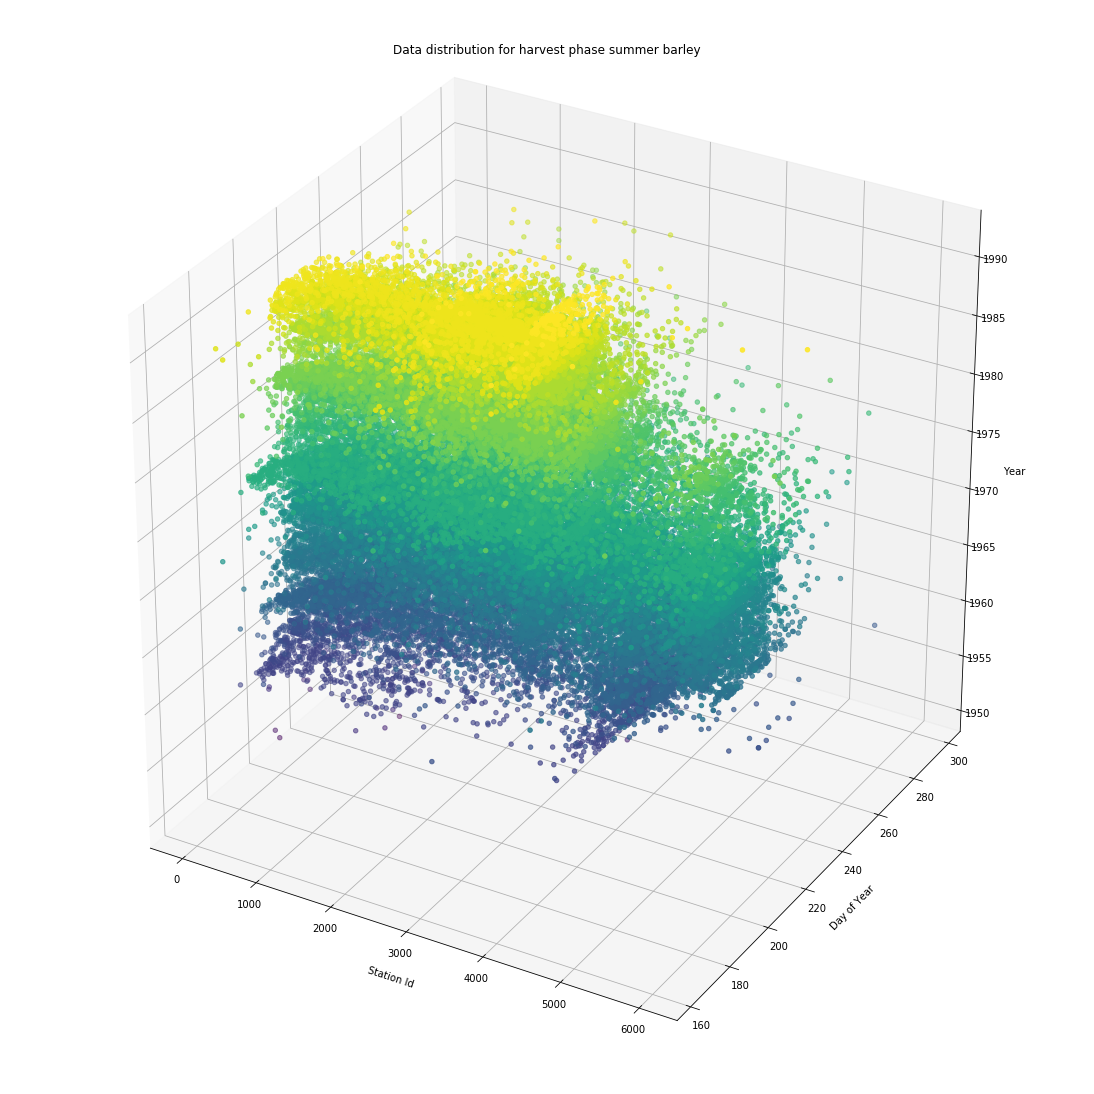

In [37]:
# 3D-Scatterplot Summer barley


fig = plt.figure(figsize=(15,15))
ax=Axes3D(fig)


xs = df_sb_harvest['s_id']
ys = df_sb_harvest['day_year']
zs =df_sb_harvest['year']
ax.scatter(xs, ys, zs, c=df_sb_harvest['year'])
ax.set_xlabel('Station Id', labelpad=10)
ax.set_ylabel('Day of Year', labelpad=10)
ax.set_zlabel('Year', labelpad=10)

plt.title("Data distribution for harvest phase summer barley", pad=40)
plt.show()

In [69]:
from collections import Counter
lst = df_sb_harvest['s_id'].tolist()
d=Counter(lst)
d.most_common()

[(1369, 33),
 (1, 32),
 (19, 32),
 (37, 32),
 (59, 32),
 (64, 32),
 (103, 32),
 (105, 32),
 (119, 32),
 (143, 32),
 (171, 32),
 (192, 32),
 (260, 32),
 (355, 32),
 (361, 32),
 (374, 32),
 (404, 32),
 (414, 32),
 (458, 32),
 (502, 32),
 (592, 32),
 (604, 32),
 (652, 32),
 (909, 32),
 (973, 32),
 (1081, 32),
 (1170, 32),
 (1231, 32),
 (1256, 32),
 (1373, 32),
 (1434, 32),
 (1581, 32),
 (1627, 32),
 (1769, 32),
 (1999, 32),
 (2446, 32),
 (2564, 32),
 (20, 31),
 (33, 31),
 (42, 31),
 (43, 31),
 (96, 31),
 (133, 31),
 (144, 31),
 (163, 31),
 (176, 31),
 (184, 31),
 (213, 31),
 (320, 31),
 (365, 31),
 (376, 31),
 (413, 31),
 (438, 31),
 (444, 31),
 (455, 31),
 (473, 31),
 (500, 31),
 (522, 31),
 (601, 31),
 (602, 31),
 (627, 31),
 (637, 31),
 (661, 31),
 (679, 31),
 (686, 31),
 (702, 31),
 (753, 31),
 (763, 31),
 (771, 31),
 (800, 31),
 (836, 31),
 (848, 31),
 (935, 31),
 (952, 31),
 (1046, 31),
 (1308, 31),
 (1310, 31),
 (1325, 31),
 (1355, 31),
 (1482, 31),
 (1604, 31),
 (1743, 31),
 (1752

In [38]:
X = df_sb_harvest[['lon', 'lat', 'alt','year']]
y = df_sb_harvest['day_year']

In [39]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-1.08659352  4.33564343  0.05077779  0.04889895]


In [41]:
y_hat = regr.predict(X)
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_hat))

print('Coefficient of determination: %.2f'
      % r2_score(y, y_hat))

Mean squared error: 122.27
Coefficient of determination: 0.23


In [42]:
lasso = linear_model.Lasso(alpha=0.01)

In [43]:
lasso.fit(X,y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
print('Coefficients: \n', lasso.coef_)

Coefficients: 
 [-1.0821066   4.32536642  0.05070198  0.04881967]


In [45]:
y_hat = lasso.predict(X)
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_hat))

print('Coefficient of determination: %.2f'
      % r2_score(y, y_hat))

Mean squared error: 122.27
Coefficient of determination: 0.23


In [46]:
from sklearn.linear_model import Ridge

In [47]:
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
print('Coefficients: \n', ridge.coef_)

Coefficients: 
 [-1.08657739  4.33557875  0.05077733  0.04889917]


In [49]:
y_hat = ridge.predict(X)
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_hat))

print('Coefficient of determination: %.2f'
      % r2_score(y, y_hat))

Mean squared error: 122.27
Coefficient of determination: 0.23


In [50]:
mi_sb_harvest=df_sb_harvest.set_index(['s_id', 'year'])

In [51]:
len(df_sb_harvest['year'].unique().tolist()) #total no. of years

41

In [54]:
len(df_sb_harvest['s_id'].unique().tolist()) #total no. of stations

4872

In [57]:
mi_sb_harvest.drop(['month','day'], axis=1, inplace=True)

In [58]:
mi_sb_harvest

lon      lat  alt  day_year
s_id year                                  
0    1959   8.85000  49.2000  250       213
     1960   8.85000  49.2000  250       206
     1964   8.85000  49.2000  250       222
     1980   8.85000  49.2000  250       217
     1971   8.85000  49.2000  250       210
...             ...      ...  ...       ...
6029 1961  10.16670  49.2000  470       216
     1962  10.16670  49.2000  470       230
6031 1961   6.90000  52.0667   45       228
6033 1962  10.53330  52.6000   65       217
6039 1962   6.46667  50.5000  400       274

[60381 rows x 4 columns]

In [61]:
mi_sb_harvest.index.get_level_values('s_id')

TypeError: 'int' object is not callable

In [201]:
from linearmodels import PanelOLS
mod = PanelOLS(mi_sb_harvest.day_year, mi_sb_harvest[['lon', 'lat', 'alt']], time_effects=True)
print(mod.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               day_year   R-squared:                        0.2981
Estimator:                   PanelOLS   R-squared (Between):              0.9988
No. Observations:               60381   R-squared (Within):               0.0000
Date:                Mon, May 31 2021   R-squared (Overall):              0.9973
Time:                        11:51:20   Log-likelihood                -2.198e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      8543.2
Entities:                        4872   P-value                           0.0000
Avg Obs:                       12.393   Distribution:                 F(3,60337)
Min Obs:                       1.0000                                           
Max Obs:                       33.000   F-statistic (robust):             8543.2
                            

In [92]:
winterbarley_phases = df_winterbarley['phase_id'].unique().tolist()

In [93]:
winterbarley_phases_subsets = list(df_winterbarley.groupby(by = "phase_id"))

In [94]:
winterbarley_phases_subsets

[(0,         s_id       lon      lat  alt phase_id  year  month  day  day_year
  4801     314  12.81670  48.3833  480        0  1951      8    9       221
  4802     115   9.90000  50.1167  180        0  1951      8   12       224
  4804       8   8.48333  49.1667  110        0  1951      8   14       226
  4805      70   8.50000  49.0167  120        0  1951      8   15       227
  4806     963   9.93333  54.4000   18        0  1951      8   20       232
  ...      ...       ...      ...  ...      ...   ...    ...  ...       ...
  716773   186   9.13333  49.3833  210        0  1963      8   28       240
  716782   177   9.30000  48.7333  240        0  1963      8   29       241
  716789  4101   8.21667  49.1500  130        0  1963      8   30       242
  716796  1270  10.95000  49.3667  380        0  1963      8   30       242
  716809  3019   7.11667  51.3500  140        0  1963      9    1       244
  
  [79598 rows x 9 columns]),
 (1,         s_id       lon      lat  alt phase_id  y

In [ ]:
winterbarley_phases_dict = {0:"df_winter", 10:"df_first_leaves", 31: "df_stem", 51:"df_inflorescence", 100:"df_harvest", 85:"df_ripening"}
winterbarley_phases_dict

In [ ]:
df_dict_winterbarley = {}
for item in winterbarley_phases_subsets:
    dict_item = {winterbarley_phases_dict[item[0]]:item[1]}
    df_dict_winterbarley.update(dict_item)

In [ ]:
df_dict_winterbarley

In [ ]:
df_winter = df_dict_winterbarley['df_winter']

In [ ]:
df_winter

In [ ]:
df_winter['s_id']=df_winter['s_id'].astype('category')

In [ ]:
sns.catplot(data=df_winterbarley, x='s_id', y ='day_year');

In [ ]:
X = df_winterbarley[['s_id', 'year']]
y = df_winterbarley['day_year']

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

In [ ]:
print('Coefficients: \n', regr.coef_)

In [ ]:
y_hat = regr.predict(X)
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_hat))

print('Coefficient of determination: %.2f'
      % r2_score(y, y_hat))

In [ ]:
df_harvest = df_dict_winterbarley['df_harvest']
df_harvest.drop(['alt_dem', 'gss_id','phase_id', 'species', 'day', 'month', 'cult_season'], axis=1, inplace=True)

In [ ]:
df_harvest.dtypes

In [ ]:
df_harvest

In [ ]:
sns.scatterplot(data=df_harvest, x='s_id', y ='day_year', hue='year');

In [ ]:
lst_stations = sorted(df_harvest['s_id'].unique().tolist())

In [ ]:
print(lst_stations)

In [ ]:
sns.scatterplot(data=df_harvest, x='lat', y='lon')

In [ ]:
df_harvest

In [70]:
df_most_data = df_sb_harvest[df_sb_harvest['s_id']==1369]

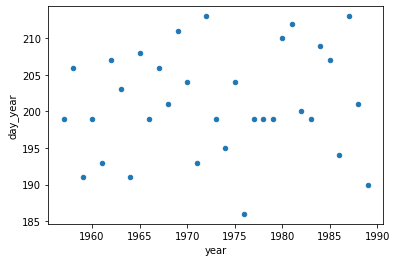

In [73]:
df_most_data.plot(x='year', y='day_year', kind='scatter')

In [ ]:
from linearmodels import PanelOLS
mod = PanelOLS(mi_sb_harvest.day_year, mi_sb_harvest[['lon', 'lat', 'alt']], time_effects=True)
print(mod.fit())